# Домашнее задание 2. Кредитные карты.

Работа выполнена с использованием размеченной [базы данных](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud, "www.kaggle.com") анонимизированных транзакций по кредитным картам.

In [5]:
# Импорт необходимых библиотек
# модуль для разделения выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split

# модули визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt

# Библиотеки для работы с векторами и таблицыми данных
import pandas as pd

## 1. Разведочный анализ данных

In [7]:
# Загрузка датафрейма
data = pd.read_csv('/Users/margo/Desktop/creditcard.csv')

print(f'Размер датафрейма: {data.shape[0]} строк, {data.shape[1]} столбцов.')
data.head()

Размер датафрейма: 284807 строк, 31 столбцов.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Выведем информацию по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Согласно таблице данные представлены численными значениями без пропуска данных.

Признаки `V1` - `V28` являются данными, преобразованными по методу главных компонент ввиду конфиденциальности транзакций. Непреобразованными данными являются только признаки `Time` и `Amount`, являющиеся временем с первой транзакции в базе данных и суммой транзакции соответственно.

### 1.1. Зависимости данных

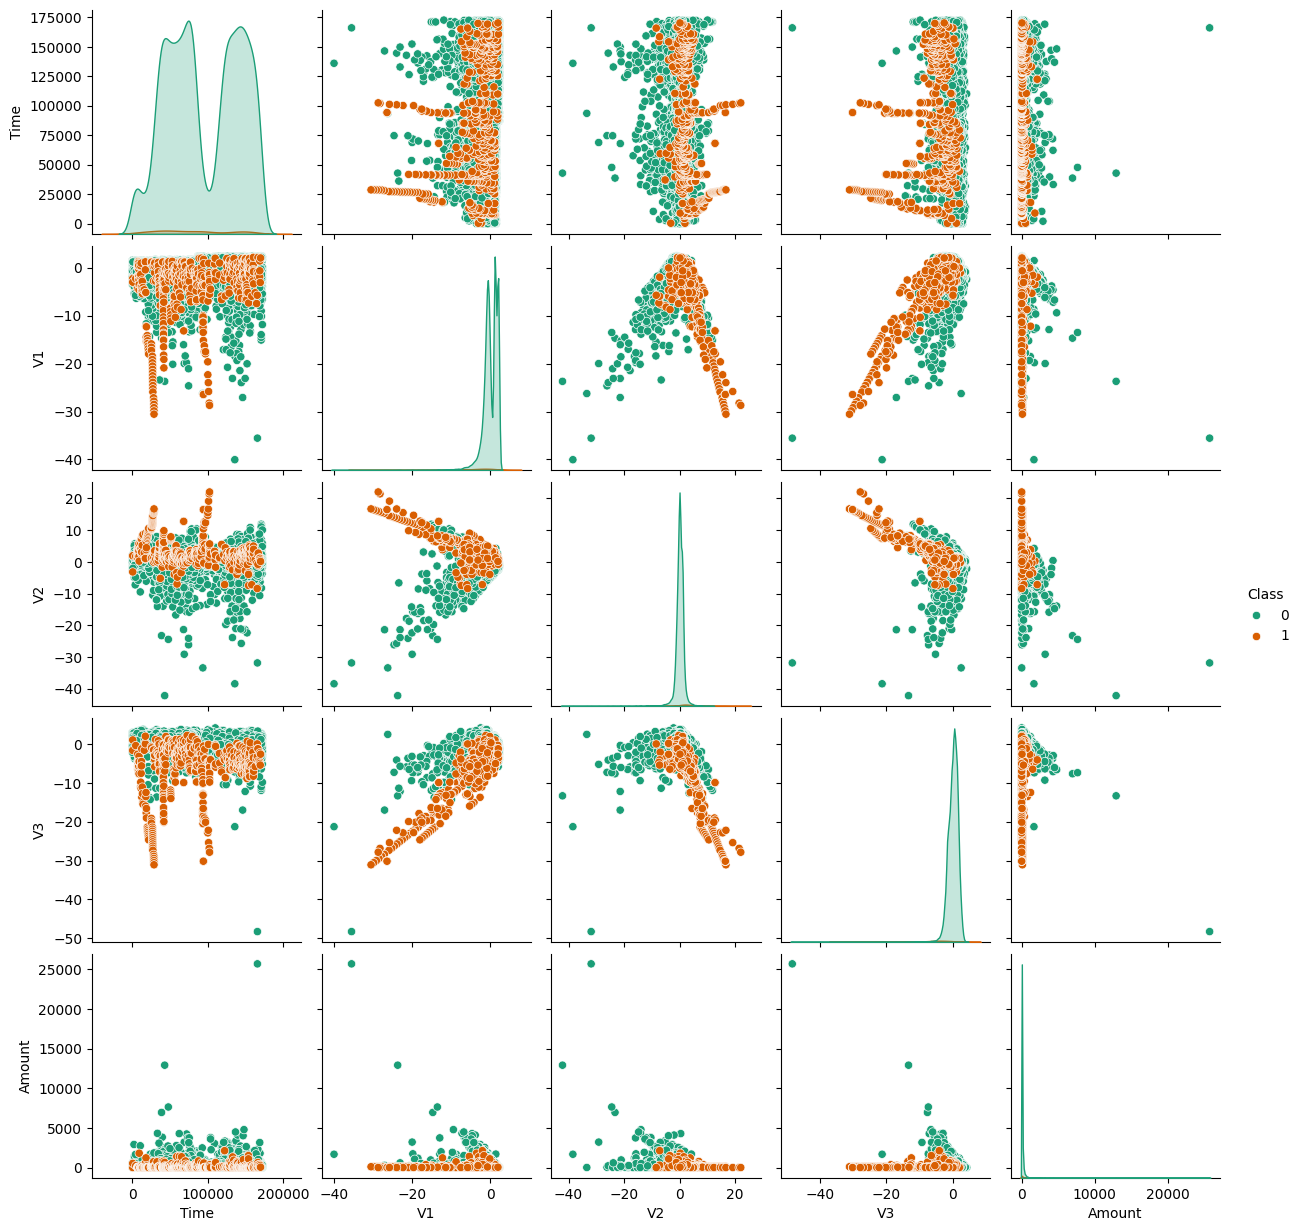

In [9]:
# Исследуем попарные зависимости части данных при помощи библиотеки seaborn
# Ввиду несбалансированности данных отобразим случайные 10% данных класса "0"...
data_0 = data[data['Class'] == 0].sample(frac=0.1)
# ...и все данные класса "1" для лучшей визуализации
data_1 = data[data['Class'] == 1]

# Также используем для визуализации лишь часть признаков: V1, V2, V3 и непреобразованные данные Time и Amount
sns.pairplot(pd.concat([data_0, data_1]).iloc[:, [0, 1, 2, 3, 29, 30]], hue='Class', palette='Dark2')

### 1.2. Сбалансированность классов

Верных транзакций: 284315;
Транзакций мошенников: 492.


<Axes: xlabel='Class', ylabel='Count'>

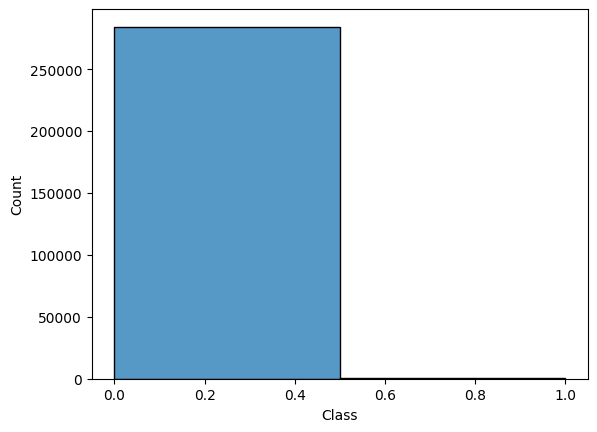

In [10]:
# Рассчитаем количество данных каждого класса

balance = data["Class"].value_counts().tolist()
print(f'Верных транзакций: {balance[0]};\nТранзакций мошенников: {balance[1]}.')

sns.histplot(data['Class'], binwidth=0.4)

Классы в базе данных несбалансированны - верных транзакций в 578 раз больше транзакций мошенников.

In [11]:
print('Верные транзакции:', round(data['Class'].value_counts()[0]/len(data) * 100, 2), '% базы данных')
print('Транзакции мошенников:', round(data['Class'].value_counts()[1]/len(data) * 100, 2), '% базы данных')

Верные транзакции: 99.83 % базы данных
Транзакции мошенников: 0.17 % базы данных


### 1.3. Статистические параметры признаков базы данных.

In [12]:
statistics_general = data.describe()
print(statistics_general.loc[['mean', 'std']])

              Time            V1            V2            V3            V4  \
mean  94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std   47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   

                V5            V6            V7            V8            V9  \
mean  9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std   1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   

      ...           V21           V22           V23           V24  \
mean  ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std   ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   

               V25           V26           V27           V28      Amount  \
mean  5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16   88.349619   
std   5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01  250.120109   

         Class  
mean  0.001727  
std   0.041527  

[2 rows x 31 columns]


## 2. Разделение данных

Ввиду отсутствия баланса в данных необходимо провести перебалансировку. Для решения данной проблемы можно использовать различные техники **недосэмплирования** и **пересэмплирования**.

Ввиду отсутствия линейной зависимости в данных возможно решение с помощью **логистической регрессии** (LogisticRegression) или **градиентного бустинга**.

Техники недосэмплирования:

* RandomUnderSampler,
* NearMiss-1,
* NearMiss-2.

Техники пересэмплирования:

* RandomOverSampler,
* SMOTE,
* ADASYN.



In [14]:
# Импортируем необходимые библиотеки
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

samplers = [RandomUnderSampler(), NearMiss(version=1), NearMiss(version=2), RandomOverSampler(), SMOTE(), ADASYN()]

Разделим данные на параметры и таргет и проанализируем полученные данные.

In [15]:
X = data.drop('Class', axis=1)
y = data['Class']

print(f'Размер таблицы: {X.shape[0]} на {X.shape[1]}\nСреднее значение таргета: {y.mean()}')

Размер таблицы: 284807 на 30
Среднее значение таргета: 0.001727485630620034


Разделение данных на тестовую и обучающую выборки в соотношении 20 % и 80 %.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=21)

Показатели качества данных:
* точность,
* сбалансированная точность,
* каппа Коэна,
* F1-мера,
* коэффициент Мэттьюса.

In [17]:
# Импортируем метрики
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score, f1_score, matthews_corrcoef

scores = [accuracy_score, balanced_accuracy_score, cohen_kappa_score, f1_score, matthews_corrcoef]
scores_names = ['accuracy_score', 'balanced_accuracy_score', 'cohen_kappa_score', 'f1_score', 'matthews_corrcoef']

## 3. Predict

In [18]:
result = {}

for sample in samplers:
  X_resmpl, y_resmpl = sample.fit_resample(X_train, y_train)
  print(f'\n{str(sample)}\nРазмер таблицы: {X_resmpl.shape[0]} на {X_resmpl.shape[1]}\nСреднее значение таргета: {y_resmpl.mean()}\n')

  model = LogisticRegression()
  model.fit(X_resmpl, y_resmpl)
  predict = model.predict(X_test)

  result[str(sample)] = []
  for score in scores:
    result[str(sample)].append(score(y_test, predict))


RandomUnderSampler()
Размер таблицы: 766 на 30
Среднее значение таргета: 0.5


NearMiss()
Размер таблицы: 766 на 30
Среднее значение таргета: 0.5



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



NearMiss(version=2)
Размер таблицы: 766 на 30
Среднее значение таргета: 0.5


RandomOverSampler()
Размер таблицы: 454924 на 30
Среднее значение таргета: 0.5



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



SMOTE()
Размер таблицы: 454924 на 30
Среднее значение таргета: 0.5


ADASYN()
Размер таблицы: 454885 на 30
Среднее значение таргета: 0.4999571320223793



In [19]:
result = pd.DataFrame(result, index=scores_names)
result

,RandomUnderSampler(),NearMiss(),NearMiss(version=2),RandomOverSampler(),SMOTE(),ADASYN()
accuracy_score,0.955321,0.884537,0.919543,0.967206,0.969032,0.978916
balanced_accuracy_score,0.927256,0.919266,0.913911,0.937788,0.906654,0.934497
cohen_kappa_score,0.068082,0.026992,0.037815,0.092548,0.091172,0.136020
f1_score,0.071507,0.030656,0.041414,0.095837,0.094456,0.139068
matthews_corrcoef,0.177887,0.113927,0.131846,0.210081,0.201089,0.255654


## 4. Вывод
Лучший результат по наибольшему числу лучших показателей качества показало решение **пересэмплирования по технологии SMOTE**.